<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Fluorescence_Parameters_Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

Before everything else, parameters used inside this code should be defined. This is done to make corrections easier and avoid setting them inside the code.

In [ ]:
# THIS COLAB NOTEBOOK SHOULD BE USED TO CALCULATE AND DRAW THE PARAMETERS OF THE PROMPT FLUORESCENCE

#!sudo locale-gen en_US.UTF-8
#!sudo update-locale

In [274]:
# PARAMETERS
# export (converted csv)_(plant species)_(method)_(date).csv
#csv_file = '/content/export3.csv'

indexes = ['', 'Phi_Po', 'Phi_Eo', 'Phi_Ro', 'Phi_Do', 'Pi_Abs', 'Fo', 'Fm', 'RC/CSo', 'RC/CSm', 'ABS/RC', 'gamma_chl']

parameter = indexes[1] # required column

In [276]:
stacked = False
sorting = False
abbreviations = False

y_label = '[a.u.]'
title_main =  '' #'GOX activity (Production of glyoxylate)' #

group_order1 = [
    'Lp M', 'Lp N',
    'Ac M', 'Ac N', 'Ad M', 'Ad N',
    'Fa M', 'Fa N', 'Fp M', 'Fp N', 'Fr M', 'Fr N', 'Bi M', 'Bi N',
]

group_order2 = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n8', 'n9', 'n10',
               'n11', 'n12', 'n13', 'n14', 'n15', 'n17', 'n19',
                'n20', 'n21', 'n22', 'xA', 'xB', 'xC', 'xD', ]

group_order3 = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
               'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19',
                'n20', 'n21', 'n22', 'xA', 'xB', 'xC', 'xD', 'xF', 'xG']

group_order = ['n4', 'n13', 'xG', 'Taestivum1', 'Taestivum2']

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [286]:
import pandas as pd
import numpy as np
import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

# прочитане директно от изхода на приложението за обработка на сурови данни от апарата
df = pd.read_csv(csv_file, delimiter=',', decimal='.', skiprows=0)
#df = pd.read_csv(csv_file, delimiter='\t', decimal='.', skiprows=5)
#.T # delimiter '\t' or ';'
csv_file

'mixed_cultures_ojip_all.csv'

In [268]:
# обработка на csv файла, така че да се преобразува във вида, подходящ за ползване от кода
df.set_index('index', inplace=True)
df = df.T
df = df.reset_index()
df = df.rename(columns={'index': 'groups'})
df['groups'] = df['groups'].apply(lambda x: x.split('.')[0])
df = df[~df['groups'].str.contains('Unnamed')]

In [169]:
# prompt: изрежи всички колони между 2рата и колоната с име Phi_Po

# Find the index of the column named 'Phi_Po' // Fo
#phi_po_index = df.columns.get_loc(parameter)

# Slice the DataFrame to keep only the columns before the 2nd column and from 'Phi_Po' onwards
#df = pd.concat([df.iloc[:, :1], df.iloc[:, phi_po_index:]], axis=1)

In [287]:
df

,groups,time,Bckg,Fo,Fj,Fi,Fm,Fv,Vj,Vi,...,DIo/RC,FLASH-Wavelength [nm],FLASH-Percent [%],FLASH-Intensity [uE],SUPER-Wavelength [nm],SUPER-Percent [%],SUPER-Intensity [uE],ACTINIC-Wavelength [nm],ACTINIC-Percent [%],ACTINIC-Intensity [uE]
0,La s May 21,11:42:47 21.5.2024,390,9103,28479,41094,54846,45743,0.424,0.699,...,0.264,455,100,-NAN,455,100,-NAN,455,100,1000
1,La s May 21,11:43:23 21.5.2024,390,8030,22140,29747,44572,36542,0.386,0.594,...,0.310,455,100,-NAN,455,100,-NAN,455,100,1000
2,La s May 21,11:43:43 21.5.2024,390,7900,23505,34071,49644,41744,0.374,0.627,...,0.248,455,100,-NAN,455,100,-NAN,455,100,1000
3,La m May 21,11:44:26 21.5.2024,390,10436,27601,38623,50522,40086,0.428,0.703,...,0.385,455,100,-NAN,455,100,-NAN,455,100,1000
4,La m May 21,11:44:43 21.5.2024,390,7900,22302,34266,48571,40671,0.354,0.648,...,0.247,455,100,-NAN,455,100,-NAN,455,100,1000
5,La m May 21,11:45:02 21.5.2024,390,8680,24090,35957,49384,40704,0.379,0.670,...,0.270,455,100,-NAN,455,100,-NAN,455,100,1000
6,Hv s May 21,11:46:08 21.5.2024,390,11216,28544,32055,47173,35957,0.482,0.580,...,0.590,455,100,-NAN,455,100,-NAN,455,100,1000
7,Hv s May 21,11:46:31 21.5.2024,390,11411,31340,37810,53675,42264,0.472,0.625,...,0.541,455,100,-NAN,455,100,-NAN,455,100,1000
8,Hv s May 21,11:46:50 21.5.2024,390,9883,27601,34949,49937,40054,0.442,0.626,...,0.427,455,100,-NAN,455,100,-NAN,455,100,1000
9,Hv m May 21,11:47:27 21.5.2024,390,12419,37452,54033,70516,58097,0.431,0.716,...,0.418,455,100,-NAN,455,100,-NAN,455,100,1000


In [ ]:
#df['Combined'] = df['FRAP'].astype(str) + ', ' + df['PM'].astype(str) + ', ' + df['Folin'].astype(str)

In [285]:
# Get a list of rows to keep
rows_to_keep = df['groups'].apply(lambda x: x in group_order)

# Filter the DataFrame
df = df[rows_to_keep]

# Print the resulting DataFrame to verify
df

,groups,time,Bckg,Fo,Fj,Fi,Fm,Fv,Vj,Vi,...,DIo/RC,FLASH-Wavelength [nm],FLASH-Percent [%],FLASH-Intensity [uE],SUPER-Wavelength [nm],SUPER-Percent [%],SUPER-Intensity [uE],ACTINIC-Wavelength [nm],ACTINIC-Percent [%],ACTINIC-Intensity [uE]


In [271]:
#df = df.dropna()
if (sorting):
  df.sort_values(by="groups", key=lambda column: column.map(lambda e: group_order.index(e)), inplace=True)

In [288]:
try:
  # Addition for the grouping by month:
  df['variant_month'] = df['groups'] + '_' + df['month']
  sorting_labels = 'variant_month' #'groups' if single measurement
  import re

  def sort_key(variant_month):
      group, month = variant_month.split('_')
      match = re.search(r'\d+', group)  # find the numerical part of the group
      if match:
          return (month, int(match.group(0)))  # Sort by number first
      else:
          return (month, float('inf'))  # Sort by group name if no number is found
  group_order = sorted(df['variant_month'].unique().tolist(), key=sort_key)
except:
    # Addition for the grouping by month:
  df['variant_month'] = df['groups']
  sorting_labels = 'variant_month' #'groups' if single measurement
  import re

  def sort_key(variant_month):
      group = variant_month
      match = re.search(r'\d+', group)  # find the numerical part of the group
      if match:
          return (1, int(match.group(0)))  # Sort by number first
      else:
          return (1, float('inf'))  # Sort by group name if no number is found
  group_order = sorted(df['variant_month'].unique().tolist(), key=sort_key)

In [ ]:
group_order

['n4', 'n13', 'xG']

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [289]:
# print the resulting DataFrame
#print(df)
named = np.array(df.pop(sorting_labels))
transposed_df = df.T

1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [290]:
#ABBREVIATION
if abbreviations:
  try:
      print('before: ', named)
      import re
      # Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
      for i in range(len(named)):
          c = named[i][0]
          #named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])
          named[i] = "".join(re.findall(r'\b\w', named[i]))

      print('after: ', named)
  except:
      print(named.astype(int))
      named=named.astype(int)
      print('latin names not present')

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

This short code is used to perform calculations, based on the compound parameters, we would like to obtain from the original data. For example we would want to find out the values of the parameter 'RC/CS$_o$'. Thus, we can use the already present in the raw data 'F$_o$', 'ABS/RC' and divide them to obtain the needed parameter.

In [291]:
from logging import exception
#DERIVED PARAMETERS
def derivations(params, y_height, y_dist, title_main):
    Fi_params = df.pop('Fi')
    Fo_params = df.pop('Fo')
    Fm_params = df.pop('Fm')
    ABS_params = df.pop('ABS/RC')
    #index = np.array(df.pop('index'))

    if params == 'Phi_Ro':
        y_height = 0.4 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Ro}$ '
        derived_params = (Fm_params - Fi_params)/Fm_params

    elif params == 'Phi_Eo':
        y_height = 0.7 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Eo}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'Phi_Po':
        y_height = 1 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Po}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'Phi_Do':
        derived_params = transposed_df.loc[params]
        y_height = np.round(derived_params.max(), 2)+0.02 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Do}$ '

    elif params == 'Pi_Abs':
        derived_params = transposed_df.loc[params]
        y_height = np.round(derived_params.max())+0.5 # height of the graph
        y_dist = 2 # distance between labels
        title_main = 'PI $_{ABS}$ '

    elif params == 'gamma_chl':
        y_height = 0.5 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03B3$_{chl}$'
        #transp_p = pd.to_numeric(compound_params.T)
        derived_params = 1/(ABS_params + 1)

    elif params == 'RC/CSo':
        y_height = 8000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'RC/CS$_O$'
        derived_params = Fo_params/ABS_params

    elif params == 'RC/CSm':
        y_height = 45000 # height of the graph
        y_dist = 10000 # distance between labels
        title_main = 'RC/CS$_M$'
        derived_params = Fm_params/ABS_params

    elif params == 'Fo':
        y_height = 17000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'ABS/CS$_O$ (F$_{O}$)'
        derived_params = Fo_params

    elif params == 'Fm':
        y_height = 90000 # height of the graph
        y_dist = 20000 # distance between labels
        title_main = 'ABS/CS$_M$ (F$_{M}$)'
        derived_params = Fm_params

    elif params == 'ABS/RC':
        y_height = np.round(ABS_params.max())+0.5 # height of the graph
        y_dist = 1 # distance between labels
        title_main = 'ABS/RC'
        derived_params = ABS_params

    else:
        params = df.pop(parameter) #required param
        derived_params = pd.to_numeric(params.T)

    data = pd.DataFrame({
        #'Index': index,
        'Variant': named,
        'Value': derived_params
    })

    return data, y_height, y_dist, title_main

In [ ]:
# NORMALISING the very large values of the parameters
'''
compound_params = df.pop('Fm')
transp_p = pd.to_numeric(compound_params.T)

max_p1 = max(transp_df)
max_p2 = max(transp_p)
min_p1 = min(transp_df)
min_p2 = min(transp_p)

df_norm = (transp_df - min_p1) / (max_p1 - min_p1)
p_norm = (transp_p - min_p2) / (max_p2 - min_p2)
p_norm
'''

"\ncompound_params = df.pop('Fm')\ntransp_p = pd.to_numeric(compound_params.T)\n\nmax_p1 = max(transp_df)\nmax_p2 = max(transp_p)\nmin_p1 = min(transp_df)\nmin_p2 = min(transp_p)\n\ndf_norm = (transp_df - min_p1) / (max_p1 - min_p1)\np_norm = (transp_p - min_p2) / (max_p2 - min_p2)\np_norm\n"

1.5) Converting the dataframe into a 1D numpy array

In [ ]:
'''
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= transp_df.values # df - one param ; cp - comp param

#converting into 1D array
one_D_array = conv_arr.ravel()

print(one_D_array, named)
'''

'\nfrom matplotlib.patches import namedtuple\n#convert dataframe to matrix\nconv_arr= transp_df.values # df - one param ; cp - comp param\n\n#converting into 1D array\none_D_array = conv_arr.ravel()\n\nprint(one_D_array, named)\n'

####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [292]:
if not stacked:
  try:
      data, y_height, y_dist, title_main = derivations(parameter, y_height, y_dist, title_main)
  except Exception as e:
      print(e)
      params = df.pop(parameter) #required param
      derived_params = params.T #pd.to_numeric(params.T)
      print('no params')
      data = pd.DataFrame({
          'Variant': named,
          'Value': derived_params
      })

3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

# writing out the combinations of the groups:
```
result.pvalues[result.pvalues < 0.05]
result.reject
result_list = result.groupsunique.tolist()
all_groups = []
// writing out the all possible combinations:
while result_list:
  for n in result_list:
    if result_list[0] != n:
      print(result_list[0], n)
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

all_groups
// finding out the rejected groups (p < 0.05):
t = list(result.reject) // all groups (true or false)

from itertools import compress
ind = list(compress(range(len(t)), t)) // indeces of groups if reject == True

for i in ind:
  print(all_groups[i])

// other variant:
// find all indeces of p-values within range
print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

for i in ind:
  print(all_groups[i])
```

In [293]:
data

,Variant,Value
0,La s May 21,0.834
1,La s May 21,0.82
2,La s May 21,0.841
3,La m May 21,0.793
4,La m May 21,0.837
5,La m May 21,0.824
6,Hv s May 21,0.762
7,Hv s May 21,0.787
8,Hv s May 21,0.802
9,Hv m May 21,0.824


In [294]:
import statsmodels.stats.multicomp as mc

value = 'Value' #'8 TAC' #'Value'
variant = 'Variant' #'8 groups' #'Variant'
sorting_labels = variant
if stacked: data = df
old_data = data
dataVariant = data #data[~data[variant].str.endswith('N')]

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(dataVariant[value].astype('float'), dataVariant[variant])
#model = mc.MultiComparison(data['6 TAC'], data['6 groups'])
result = model.tukeyhsd()
#print(np.sum(result.reject), len(result.reject))
#result.groups[result.pvalues < 0.05]
#result.groups[result.reject==True]
# The null hypothesis H0 for the test states that the means of the tested groups are equal.
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Hv m Apr 26,Hv m Jun 14,0.006,1.0,-0.0309,0.0429,False
Hv m Apr 26,Hv m May 21,0.0123,0.9957,-0.0246,0.0493,False
Hv m Apr 26,Hv m May 28,0.003,1.0,-0.0339,0.0399,False
Hv m Apr 26,Hv s Apr 26,-0.0013,1.0,-0.0383,0.0356,False
Hv m Apr 26,Hv s Jun 14,0.0037,1.0,-0.0333,0.0406,False
Hv m Apr 26,Hv s May 21,-0.0393,0.0278,-0.0763,-0.0024,True
Hv m Apr 26,Hv s May 28,0.002,1.0,-0.0349,0.0389,False
Hv m Apr 26,La m Apr 26,-0.014,0.9854,-0.0509,0.0229,False
Hv m Apr 26,La m Jun 14,0.0107,0.9991,-0.0263,0.0476,False
Hv m Apr 26,La m May 21,-0.005,1.0,-0.0419,0.0319,False


In [295]:
print(np.where(np.round(result.meandiffs, 2) == 0.53)) # 46 Bi 85 Fr

(array([], dtype=int64),)


In [296]:
result_list = result.groupsunique.tolist()
all_groups = []

while result_list:
  for n in result_list:
    if result_list[0] != n:
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

#for i in ind:
#  print(all_groups[i])

[  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38
  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58
  59  60  61  62  63  64  66  67  68  69  70  71  72  73  74  76  78  79
  84  85  86  87  88  89  90  91  92  93  94  95  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
[ 5 44 55 65 75 96]
[19 32 77 82]
[80 81 83]


In [297]:
import scipy.stats as stats
import matplotlib.pyplot as plt

y_ticks = np.round(np.arange(0, y_height, y_dist), 1)
y_ticks

array([0. , 0.2, 0.4, 0.6, 0.8])

In [298]:
# define columns for data and then grouping
col_to_group=sorting_labels
col_for_data=value
data = dataVariant

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]
#I am not sure how this works but it makes an numpy array for each group
samples = np.asarray(samples).astype('float')
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly
print(samples)
# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data[col_for_data].astype('float'), data[col_to_group])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
print(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])

# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])

        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')
    #print(df_ltr.columns[cn])

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)
df_ltr

[[0.817 0.818 0.834]
 [0.82  0.83  0.837]
 [0.824 0.837 0.845]
 [0.83  0.827 0.821]
 [0.815 0.812 0.838]
 [0.825 0.826 0.829]
 [0.762 0.787 0.802]
 [0.823 0.821 0.831]
 [0.807 0.792 0.828]
 [0.83  0.823 0.848]
 [0.793 0.837 0.824]
 [0.801 0.809 0.825]
 [0.848 0.835 0.824]
 [0.849 0.849 0.843]
 [0.834 0.82  0.841]
 [0.844 0.838 0.837]]
['Hv m Apr 26' 'Hv m Jun 14' 'Hv m May 21' 'Hv m May 28' 'Hv s Apr 26'
 'Hv s Jun 14' 'Hv s May 21' 'Hv s May 28' 'La m Apr 26' 'La m Jun 14'
 'La m May 21' 'La m May 28' 'La s Apr 26' 'La s Jun 14' 'La s May 21'
 'La s May 28']
i= 0 j= 1 False
i= 0 j= 2 False
i= 0 j= 3 False
i= 0 j= 4 False
i= 0 j= 5 False
i= 0 j= 6 True
i= 0 j= 7 False
i= 0 j= 8 False
i= 0 j= 9 False
i= 0 j= 10 False
i= 0 j= 11 False
i= 0 j= 12 False
i= 0 j= 13 False
i= 0 j= 14 False
i= 0 j= 15 False
i= 1 j= 2 False
i= 1 j= 3 False
i= 1 j= 4 False
i= 1 j= 5 False
i= 1 j= 6 True
i= 1 j= 7 False
i= 1 j= 8 False
i= 1 j= 9 False
i= 1 j= 10 False
i= 1 j= 11 False
i= 1 j= 12 False
i= 1 j= 13 

,2,1,0,3,4,5,6,7,8,9,10,11,12,13,14,15
0,a,b,,,,,,,,,,,,,,
1,a,b,,,,,,,,,,,,,,
2,a,b,,,,,,,,,,,,,,
3,a,b,,,,,,,,,,,,,,
4,a,b,,,,,,,,,,,,,,
5,a,b,,,,,,,,,,,,,,
6,,,c,,,,,,,,,,,,,
7,a,b,,,,,,,,,,,,,,
8,a,,c,,,,,,,,,,,,,
9,a,b,,,,,,,,,,,,,,


In [299]:
print(dataVariant)

        Variant  Value
0   La s May 21  0.834
1   La s May 21   0.82
2   La s May 21  0.841
3   La m May 21  0.793
4   La m May 21  0.837
5   La m May 21  0.824
6   Hv s May 21  0.762
7   Hv s May 21  0.787
8   Hv s May 21  0.802
9   Hv m May 21  0.824
10  Hv m May 21  0.837
11  Hv m May 21  0.845
12  Hv m May 28   0.83
13  Hv m May 28  0.827
14  Hv m May 28  0.821
15  La m May 28  0.801
16  La m May 28  0.809
17  La m May 28  0.825
18  Hv s May 28  0.823
19  Hv s May 28  0.821
20  Hv s May 28  0.831
21  La s May 28  0.844
22  La s May 28  0.838
23  La s May 28  0.837
24  La s Jun 14  0.849
25  La s Jun 14  0.849
26  La s Jun 14  0.843
27  La m Jun 14   0.83
28  La m Jun 14  0.823
29  La m Jun 14  0.848
30  Hv s Jun 14  0.825
31  Hv s Jun 14  0.826
32  Hv s Jun 14  0.829
33  Hv m Jun 14   0.82
34  Hv m Jun 14   0.83
35  Hv m Jun 14  0.837
36  La s Apr 26  0.848
37  La s Apr 26  0.835
38  La s Apr 26  0.824
39  Hv m Apr 26  0.817
40  La m Apr 26  0.807
41  La m Apr 26  0.792
42  La m Ap

In [300]:
new_df_ltr = np.array(df_ltr.sum(axis=1))
new_ltr = []
# ORDERING OF THE LETTERS!!!
for i in range(len(group_order)):
  ltr = [group_order[i], thsd.groupsunique.tolist().index(group_order[i]),
  new_df_ltr[thsd.groupsunique.tolist().index(group_order[i])]]
  print(ltr)
  new_ltr.append(ltr[2])
#print(np.array(df_ltr.sum(axis=1)), new_ltr)

['La s Jun 14', 13, 'b']
['La m Jun 14', 9, 'ab']
['Hv s Jun 14', 5, 'ab']
['Hv m Jun 14', 1, 'ab']
['La s May 21', 14, 'ab']
['La m May 21', 10, 'abc']
['Hv s May 21', 6, 'c']
['Hv m May 21', 2, 'ab']
['La s Apr 26', 12, 'ab']
['Hv m Apr 26', 0, 'ab']
['La m Apr 26', 8, 'ac']
['Hv s Apr 26', 4, 'ab']
['Hv m May 28', 3, 'ab']
['La m May 28', 11, 'abc']
['Hv s May 28', 7, 'ab']
['La s May 28', 15, 'ab']


In [301]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10, rotation=0):

  for i, grp in enumerate(pd.unique(data[variant].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data[variant] == grp][value].max() + y * -0.05
      else:
        y_pos = y * 0.198 #y_pos = ax.get_ylim()[1]*1
      ax.text(i*1.+bplt, y_pos, new_ltr[i],
              rotation=rotation, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [302]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [303]:
pd.unique(data[variant].values)

data[sorting_labels] = pd.Categorical(data[sorting_labels], categories=group_order, ordered=True)
data = data.sort_values(sorting_labels)

data

,Variant,Value
26,La s Jun 14,0.843
25,La s Jun 14,0.849
24,La s Jun 14,0.849
29,La m Jun 14,0.848
28,La m Jun 14,0.823
27,La m Jun 14,0.83
31,Hv s Jun 14,0.826
30,Hv s Jun 14,0.825
32,Hv s Jun 14,0.829
33,Hv m Jun 14,0.82


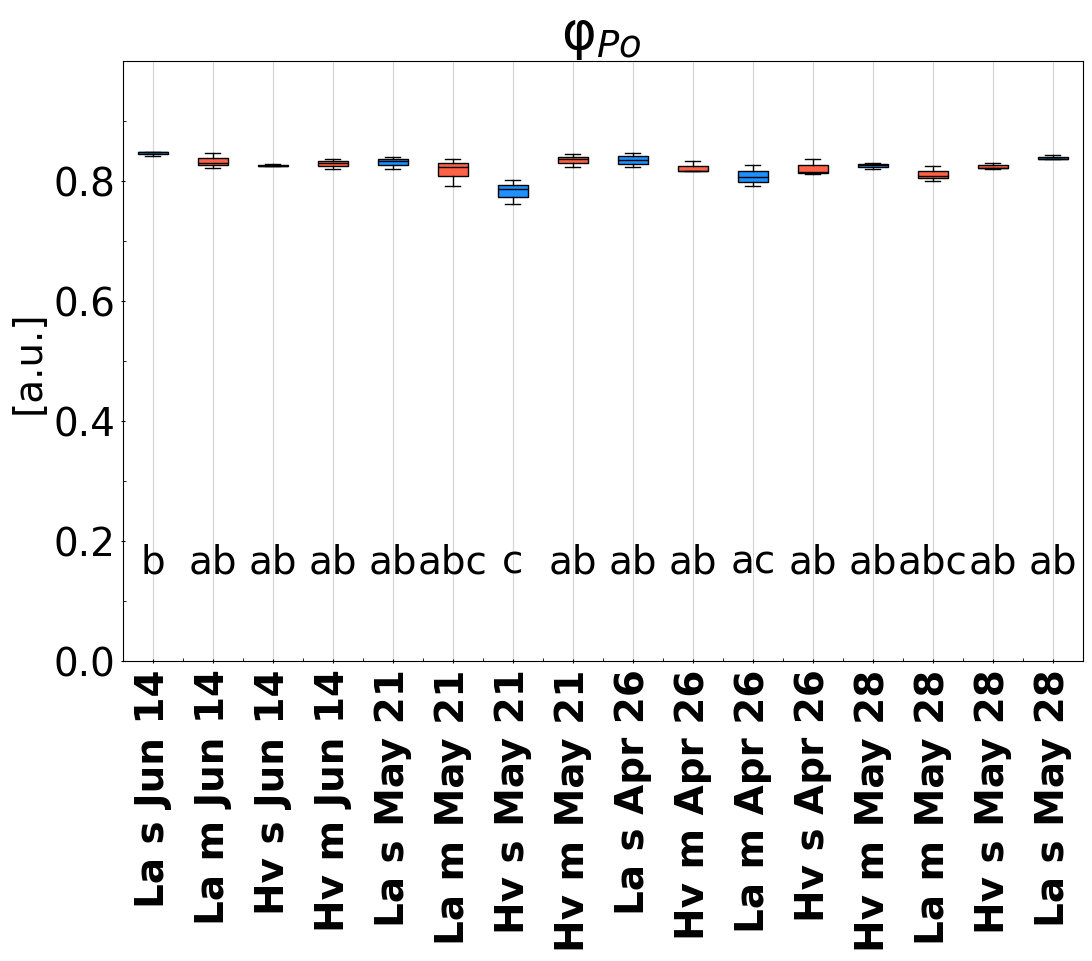

In [307]:
#Now to plot like R with a violing plot
fig,ax=plt.subplots(figsize=(12,8))
""""""
if sorting:
  # For sorting !
  labels = group_order #pd.unique(data[variant]).astype(str)
  # create categorical data type and set categorical column as new data type
  dtype = pd.CategoricalDtype(labels, ordered=False)
  data[sorting_labels] = data[sorting_labels].astype(dtype)
  labels_new = [i[5:] for i in labels]
"""
sorting_labels = 'groups'
positions = [[0.7, 1.7, 2.7], [1, 2, 3], [1.3, 2.3, 3.3]]
import seaborn as sns

#print(dtype)
for i, col_for_data in enumerate(['FRAP', 'PM', 'Folin']):
  bp_dict = df.boxplot(column=col_for_data, by=sorting_labels, ax=ax, positions=positions[i], fontsize=18, patch_artist = True,
             medianprops=dict(color='black'), # the median line
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )
"""
#import seaborn as sns
#positions = [[0.7, 1.7, 2.7], [1, 2, 3], [1.3, 2.3, 3.3]]

# Ensure 'Value' column is numeric before plotting
data['Value'] = pd.to_numeric(data['Value'], errors='coerce') # Converts to numeric, invalid values become NaN

bp_dict = data.boxplot(column=col_for_data, by=sorting_labels, ax=ax, fontsize=18, patch_artist = True,
            medianprops=dict(color='black'), # the median line
            boxprops=dict(color='black'),
            whiskerprops=dict(color='black')
            )
draw_letters(y_height, False, 1, fsize=28, rotation=0)

fill_colors = ['tomato', 'dodgerblue', 'navy', 'dodgerblue']
colors = ['tomato', 'tomato', 'navy', 'dodgerblue']
children = []
""""""
for b in range(7):
  for a in range(2):
    repeated = np.tile(np.concatenate([np.repeat(i, j) for i, j
                                       # the median line
          in zip([fill_colors[a], 'black', 'black', 'black'], [1, 4, 1, 1])]), 1)
    colors = np.append(repeated, colors)

# OJIP graph
from matplotlib.patches import PathPatch
""""""
for patch, color in zip(bp_dict.get_children(), colors):
  if isinstance(patch, PathPatch):
    patch.set(facecolor = color)

# OJIP graph
children = [bp_dict.get_children()[0], bp_dict.get_children()[7],]
#            bp_dict.get_children()[14], bp_dict.get_children()[28]]

labels1=['$\it{L. albus}$ mono', '$\it{L. albus}$ mixed',
        '$\it{H. vulgare}$ mono', '$\it{H. vulgare}$ mixed']

labels=['8:30 h (24$^{o}$C)', '12:30 h (34$^{o}$C)']

#ax.set_xticklabels([i[5:] for i in group_order], fontsize=24, style='normal', weight='bold', rotation=90)
ax.set_xticks(np.arange(1., 1.*(len(group_order) + 1), 1.), labels=group_order, fontsize=12)
#[i[:2] for i in group_order[::2]]
ax.set_xticklabels(group_order, fontsize=28, style='normal', weight='bold', rotation=90)


plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=28, rotation=0)
ax.set_ylabel(y_label, fontsize=28)

ax.set(title='', ylabel=y_label, xlabel='')
ax.set_title(title_main, fontsize=38, rotation=0)
"""
# OJIP graph
ax.legend(handles=children, labels=labels,
          loc='lower left', fontsize=22)
"""
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)

# minor ticks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.yaxis.set_minor_locator(MultipleLocator(y_dist/2))
ax.tick_params(which="major", direction="inout")
ax.tick_params(which="minor", direction="in")



# OJIP graph
plt.grid(False)
ax.yaxis.grid(False)
ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=1)
fig.suptitle('')
fig.savefig(str(indexes.index(parameter)) +  '_' + parameter + '_' + csv_file.split('.')[0] + '.jpg',
            dpi=600, bbox_inches='tight')